# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
# 1.a

import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import statsmodels.formula.api as smf


In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

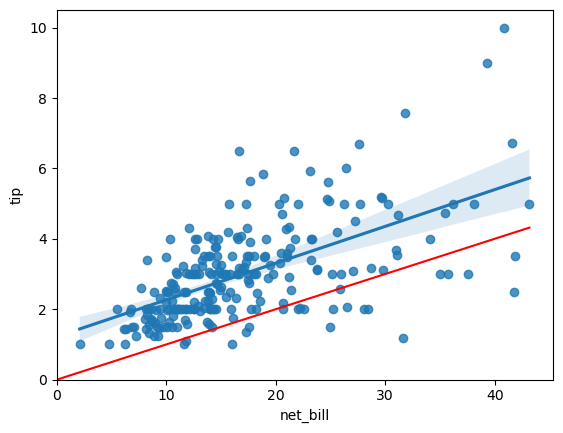

In [3]:
#1.b

sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct'] <.5])

#Gerando dados para a linha dos 10%
x = np.linspace(0, tips['net_bill'].max(), 100)
y = .1*x

#Plotando a linha dos 10%
plt.plot(x, y, '-r', label = 'linha dos 10%')

#Opções estéticas para explicar o (0, 0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

(0.0, 4.53285)

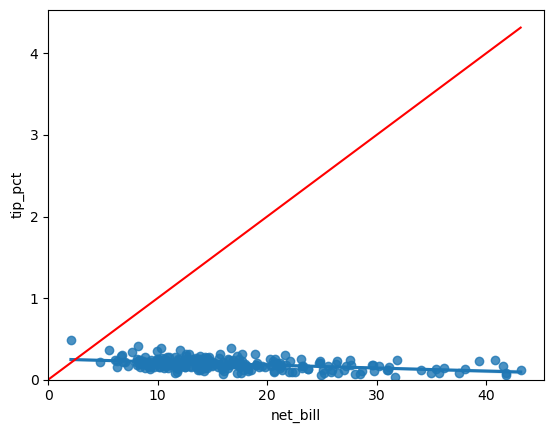

In [4]:

sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct'] <.5])

#Gerando dados para a linha dos 10%
x = np.linspace(0, tips['net_bill'].max(), 100)
y = .1*x

#Plotando a linha dos 10%
plt.plot(x, y, '-r', label = 'linha dos 10%')

#Opções estéticas para explicar o (0, 0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?


Nos dois gráficos, a correção globla é diferente (positiva no primeiro,negativa no segundo). O ajuste dos 10% também difere significativamente: no primeiro, a linha de 10% segue a tendência geral de aumento, enquanto no segundo, ela apresenta um crescimento positivo contra a tendência global de tip_pct.
Comparar diretamente os R quadrados pode ser útil para avaliar a qualidade do ajuste em relação à linha de tendência, mas não refletirá a diferença na direção das relações ou a peculiaridade da linha de 10% em relação à tendência geral.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [7]:
#4.1
reg_tip_pct = smf.ols('tip_pct ~ net_bill', data = tips).fit()

reg_tip_pct.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.52e-06
Time:                        10:02:27   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
pred = reg_tip_pct.fittedvalues
print(pred)

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Length: 244, dtype: float64


In [11]:
#4.2
reg_tip = smf.ols('tip ~ net_bill * tip_pct', data = tips).fit()
pred_tip = reg_pct.fittedvalues
print(pred_tip)

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Length: 244, dtype: float64


In [13]:
# 4.3 Cálculo do R quadrado para o modelo reg_tip
r_squared_tip = reg_tip.rsquared
print(f"O R-quadrado do modelo reg_tip é: {r_squared_tip}")

O R-quadrado do modelo reg_tip é: 1.0


In [15]:
# 4.4 compare esse 𝑅2 com o do item 1
# Apesar de ja saber, pelo reg_tip_pct.summary() que o R-quadrado é 0.091, vamos calcular novamente

r_squared_tip_pct = reg_tip_pct.rsquared
print(f"O R-quadrado do modelo reg_tip é: {r_squared_tip_pct}")

O R-quadrado do modelo reg_tip é: 0.09129084920662944


### Análise

Considerando que o R-quadrado é uma medida de ajsute do modelo, que indica a propoção da variabilidade da variável dependente que é explicada pelas variáveis indepentedes. Podemos observar que o modelo reg_pct com R-quadrado 1 indica um ajuste perfeito, ou seja, este modelo explica perfeitamente a valiação na vaiável dependente (tip) com base nas variáveis independentes (tip_pct e net_bill). Enquanto que o modelo reg_tip_pct com R-quadrado de 0.0913, indica um ajuste mais fraco, explicando apenas cerca de 9.13% da vaiação na variável dependente (tip).
Portanto ao comparar esse dois R-quadrados, podemos concluir que o modelo reg_tip parecer ser mais eficz em explicar a variação na variável dependente do que o modelo reg_tip_pct.